In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Height-Weight.xlsx')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df1 = df.copy()
df2 = df.copy()

In [5]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [7]:
df.shape

(8555, 3)

In [8]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [9]:
df.corr()

ValueError: could not convert string to float: 'Male'

# Label Encoder

In [10]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [11]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])
df.head()        

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


# Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [13]:
df['Height'] = mm.fit_transform(df[['Height']])

In [14]:
df.head()

,Gender,Height,Weight
0,1,0.744399,241.893563
1,1,0.548328,162.310473
2,1,0.754583,212.740856
3,1,0.662487,220.042470
4,1,0.590905,206.349801


# Separete x,y

In [15]:
x = df.drop('Weight', axis=1)
x.head()

,Gender,Height
0,1,0.744399
1,1,0.548328
2,1,0.754583
3,1,0.662487
4,1,0.590905


In [16]:
y = df[['Weight']]

In [17]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


# Split Train & Test

In [18]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

In [19]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=78)

In [20]:
xtrain.head()

,Gender,Height
2984,1,0.516626
6487,0,0.296121
7243,0,0.284884
6898,0,0.218997
6136,0,0.416769


In [21]:
ytrain.head()

,Weight
2984,190.964765
6487,138.381679
7243,141.855825
6898,106.853924
6136,129.375502


In [23]:
xtrain.shape

(5988, 2)

# Applying Linear Regression

In [22]:
ln = LinearRegression()

In [23]:
ln.fit(xtrain,ytrain)

LinearRegression()

In [24]:
pred = ln.predict(xtest)

In [25]:
pred

array([[187.53844321],
       [140.10544754],
       [162.886255  ],
       ...,
       [174.14561879],
       [126.51552617],
       [227.16421198]])

In [26]:
ln.predict([[0,0.356]])

array([[136.45635696]])

# Accuracy, MSE, MAE

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [28]:
accuracy = r2_score(ytest,pred)

In [29]:
accuracy

0.8999186031764108

In [30]:
mae = mean_absolute_error(ytest,pred)

In [31]:
mae

8.096114041702727

In [60]:
mse = mean_squared_error(ytest,pred)
mse

105.07227399923437

# Visualization

ValueError: x and y must be the same size

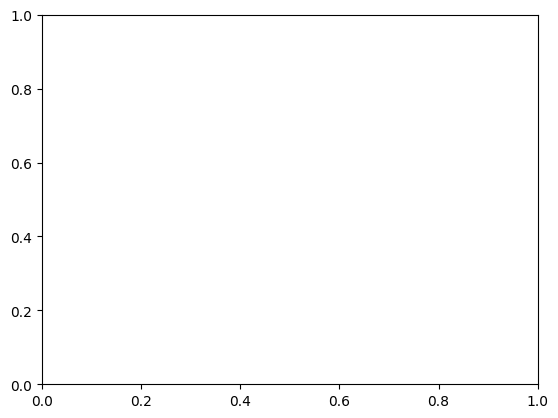

In [32]:
plt.scatter(xtrain,ytrain)


In [33]:
xtrain.head()

,Gender,Height
2984,1,0.516626
6487,0,0.296121
7243,0,0.284884
6898,0,0.218997
6136,0,0.416769


In [34]:
xtrain = xtrain.drop('Gender',axis=1)

In [35]:
xtrain.head()

,Height
2984,0.516626
6487,0.296121
7243,0.284884
6898,0.218997
6136,0.416769


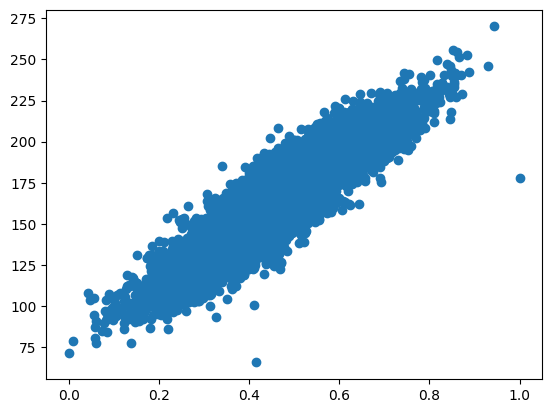

In [36]:
plt.scatter(xtrain,ytrain)

# Applying KNN Regression

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
ne = KNeighborsRegressor(n_neighbors=10)

In [37]:
ne.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=10)

In [38]:
kntest = ne.predict(xtest)

In [39]:
kntest

array([[186.98045035],
       [142.84803409],
       [155.91317517],
       ...,
       [174.63819434],
       [126.01561003],
       [229.65089698]])

In [40]:
ne.predict([[0,0.356]])

array([[137.38458453]])

# Evaluate Model

In [41]:
r2_score(ytest,kntest)

0.8896589115374288

In [42]:
mse = mean_squared_error(ytest,kntest)

In [43]:
mse

115.84359779419448

In [44]:
mae = mean_absolute_error(ytest,kntest)

In [45]:
mae

8.489224366719517